# Guidestar Targets Example

Some programs uses multiple guidestar targets for a given observation. We can observe the technical functions of the JWST when FGS locks on to a guidestar and switches to the next using Spelunker. For this example, we will be exploring Program ID 2079.

In [1]:
import sys
sys.path.append('/Users/ddeal/JWST-FGS-Spelunker/JWST-FGS-Spelunker-main/')

import Spelunker

spk = Spelunker.load('/Users/ddeal/JWST-Treasure-Chest/', pid=1534)

INFO: Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340000825_cal.fits with expected size 9388800. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340002102_cal.fits with expected size 7827840. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001002_03101_00001_guider1/jw01534001002_gs-fg_2022340003651_cal.fits with expected size 8772480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001003_03101_00001_guider1/jw01534001003_gs-fg_2022340005224_cal.fits with expected size 8772480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001004_03101_00001_guider1/jw01534001004_gs-fg_2022340010755_cal.fits with expected size 8766720. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534002001_05101_00001_guider2/jw01534002001_gs-fg_2022338014704_cal.fits with expected size 10941120. [astroquer

<WCSAxes: title={'center': 'Guidestar positions — 1534'}>

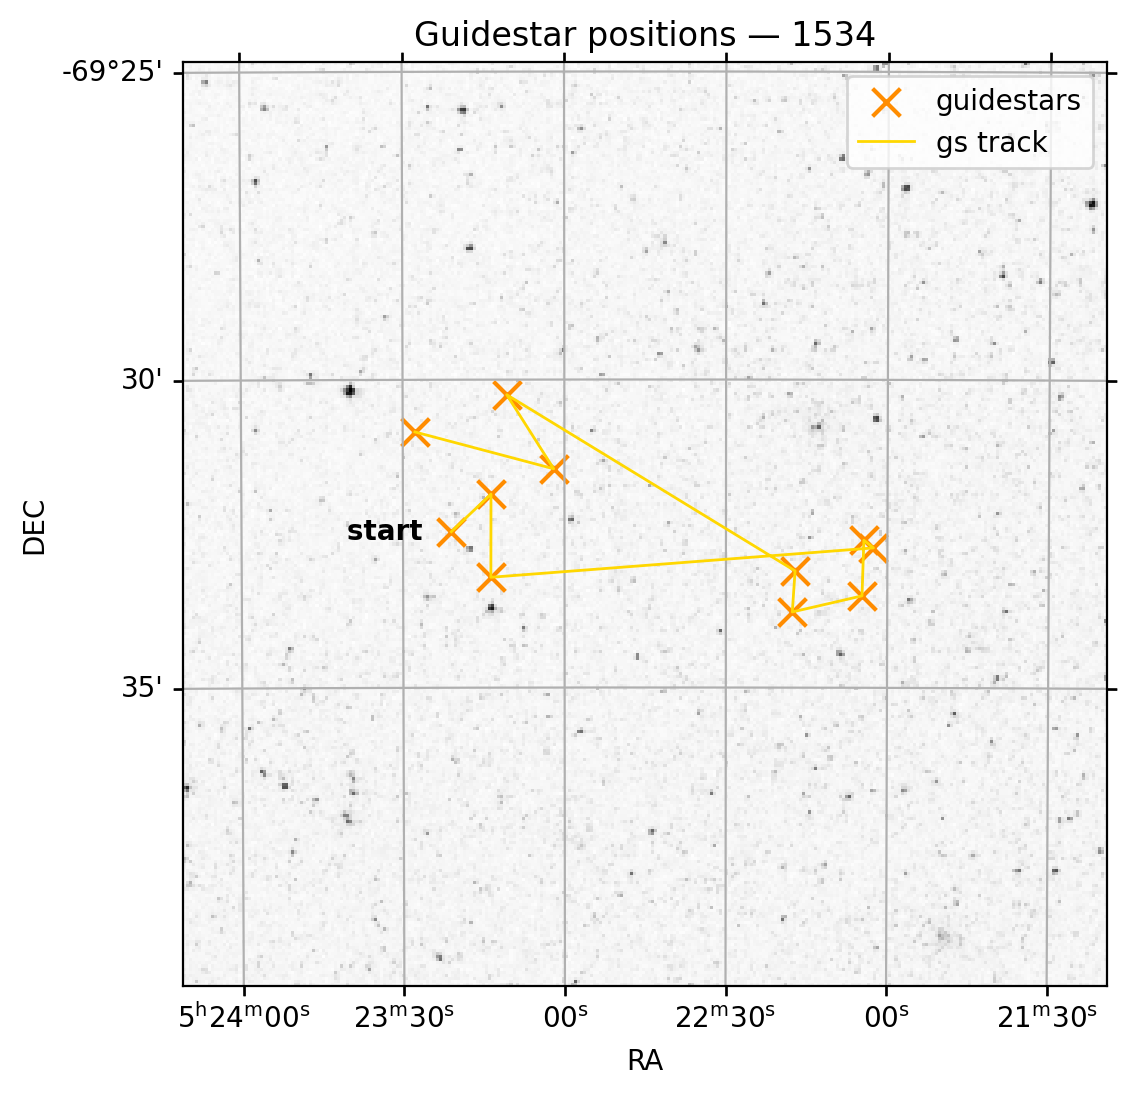

In [2]:
spk.guidestar_plot()

In [17]:
spk.object_properties

,guidestar_catalog_id,gaiadr1ID,gaiadr1ID,int_start,int_stop,ra,dec,Jmag,Hmag
0,S1HP079555,4658077781377287680,4658077781376437888,59917.066396,59917.074354,80.837584,-69.541124,13.659,12.898
1,S1HP080554,4658077991763987712,4658077991799023616,59917.089163,59917.096759,80.806837,-69.530972,15.001,14.282
2,S1HP078573,4657983910572904320,4657983910572904320,59917.112547,59917.118705,80.807043,-69.553474,13.839,13.078
3,S1HP079590,4657986831103727872,4657986835382982016,59918.999015,59919.005848,80.510790,-69.545479,15.410,14.839
4,S1HP079769,4657986831078120832,4657986835433225728,59919.019436,59919.025598,80.518235,-69.543415,15.231,14.341
5,S1HP078292,4657986796681532672,4657986801073794432,59919.041018,59919.047165,80.519564,-69.558464,12.804,11.883
6,S1HP077850,4657986762384054144,4657986766713867264,60067.871344,60067.877490,80.573531,-69.562862,12.957,12.227
7,S1HP197501,4657986865463528832,4657986869793061376,60067.882117,60067.888264,80.571447,-69.551750,13.063,12.168
8,S1HP773376,,4658078124973829632,60069.733171,60069.740086,80.794522,-69.504084,13.426,12.654
9,S1HP081366,4658078056254368128,4658078056254368128,60069.753592,60069.759620,80.758291,-69.524143,12.765,11.899


In [9]:
ra = spk.object_properties['ra']
dec = spk.object_properties['dec']

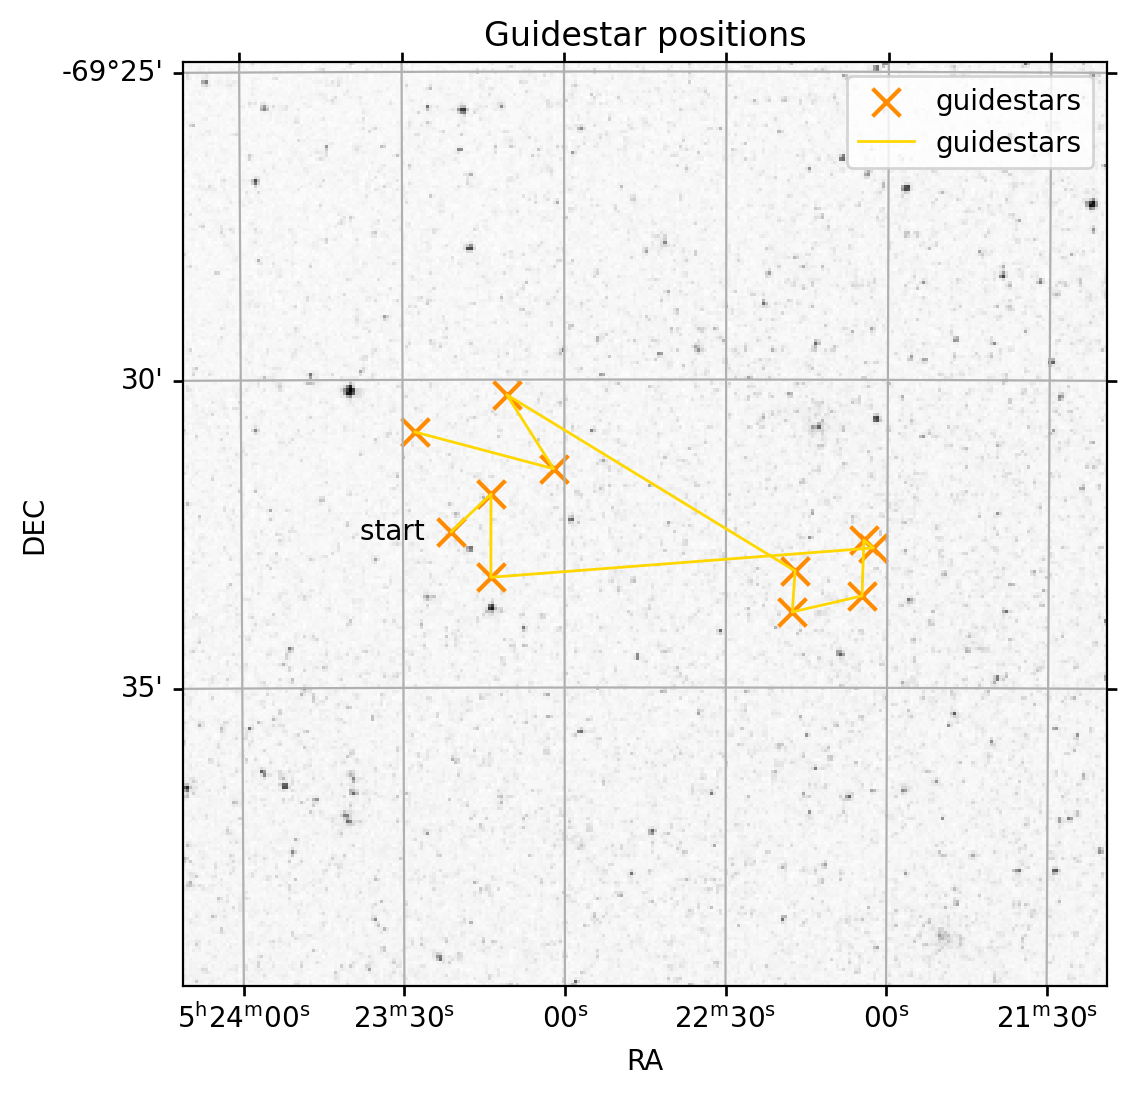

In [112]:
from astroplan.plots import plot_finder_image
from astropy import coordinates
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy import units as u
from astroquery.skyview import SkyView
from astropy.wcs import WCS
from astroplan import FixedTarget


coords = SkyCoord(ra, dec, unit='deg')
target = SkyCoord(np.mean(coords.ra),np.mean(coords.dec),unit='deg')

fig, ax1 = plt.subplots(figsize=(6,6),dpi=200)
ax, hdu = plot_finder_image(target, survey='DSS', fov_radius=15*u.arcmin,)
ax1.set_axis_off()
ax.scatter(coords.ra, coords.dec,  color='darkorange', marker='x', s=100, linewidth=1.5, transform=ax.get_transform('fk5'), label='guidestars')
ax.plot(coords.ra, coords.dec,  color='gold', linewidth=1, transform=ax.get_transform('fk5'), label='guidestars')
ax.text(coords.ra[0].value, coords.dec[0].value, s='start   ', horizontalalignment='right' , verticalalignment='center', transform=ax.get_transform('fk5'),)

ax.set_title("Guidestar positions")
ax.legend()

In [45]:
import numpy as np 
np.mean(coords.ra)

np.mean(coords.dec)

<Latitude -69.53907956 deg>

In [103]:
coords.ra[0].value

80.8375841177552

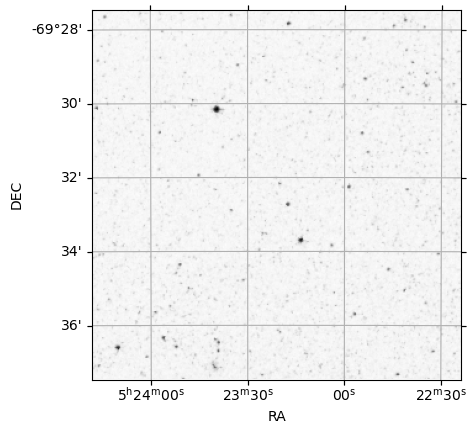

In [20]:
from astroplan.plots import plot_finder_image
from astroplan import FixedTarget
import matplotlib.pyplot as plt

messier1 = FixedTarget.from_name("M1")
ax, hdu = plot_finder_image(messier1)
plt.show()

In [18]:
SkyCoord(ra, dec, unit='deg')[0]

<SkyCoord (ICRS): (ra, dec) in deg
    (80.83758412, -69.54112376)>

<FixedTarget "M1" at SkyCoord (ICRS): (ra, dec) in deg (83.6287, 22.0147)>

(60067.84, 60067.9)

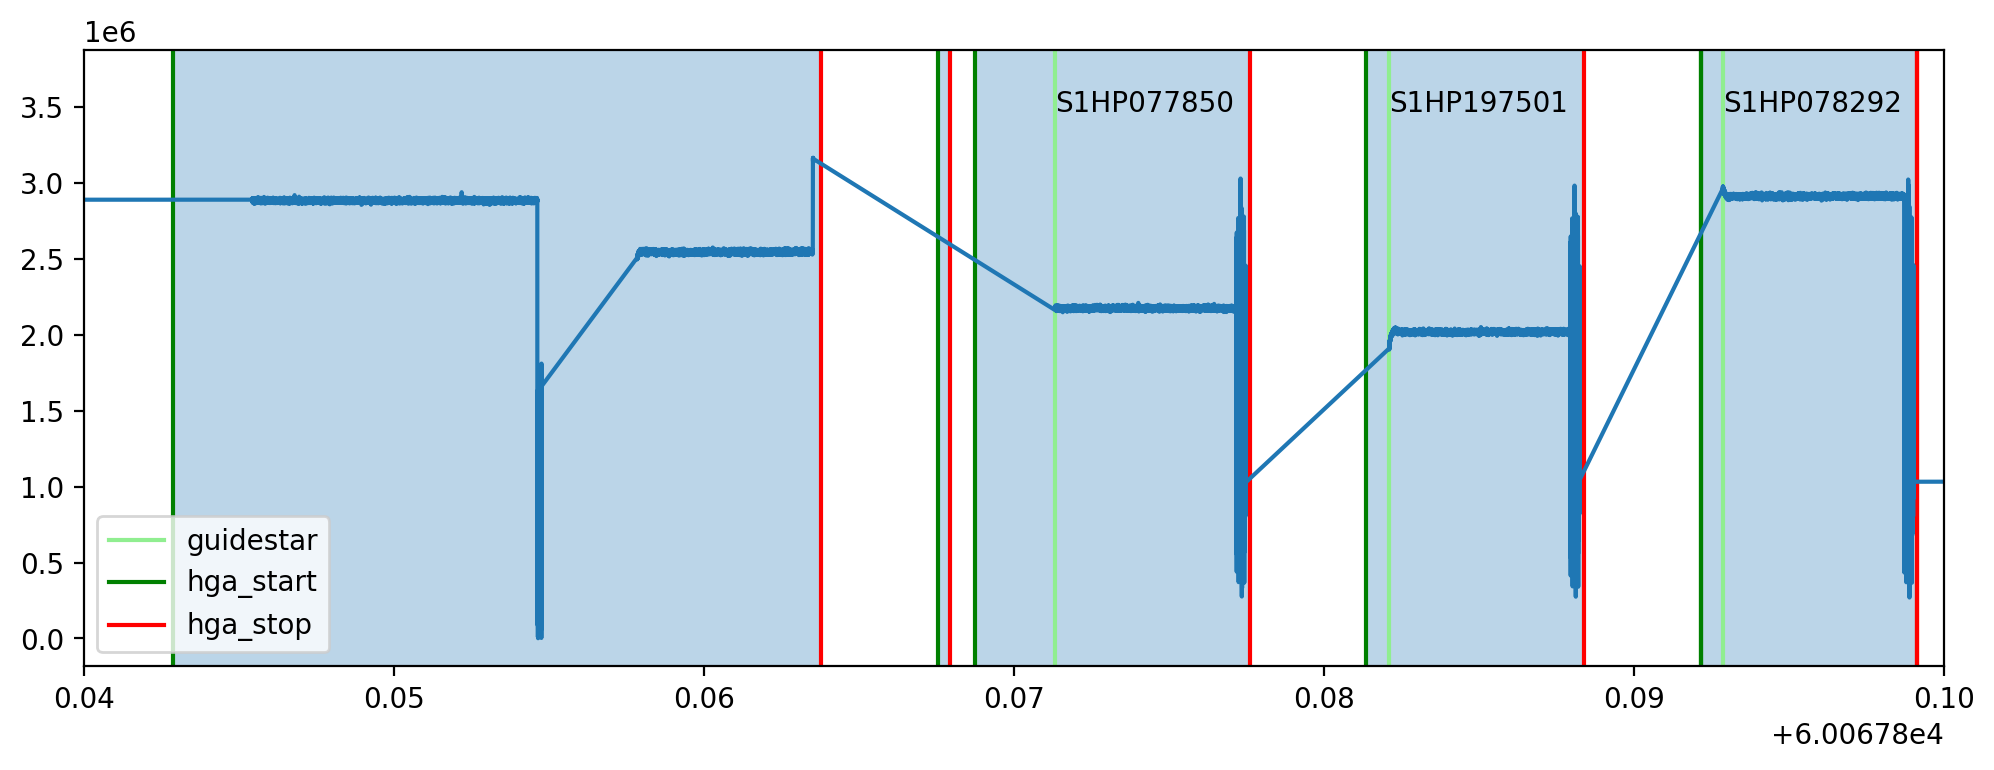

In [29]:
spk.mast_api_token = '8eedd0a371a44e598a9c4489e3148811'

fig, ax = plt.subplots(figsize=(12,4),dpi=200)
#ax = spk.mnemonics_local('FILENAME')
ax = spk.mnemonics_local('GUIDESTAR')
ax = spk.mnemonics('SA_ZHGAUPST', 60067.84, 60067.9)

ax.plot(spk.fg_time, spk.fg_flux)
plt.legend(loc=3)

plt.xlim(60067.84, 60067.9)


(60067.84, 60067.9)

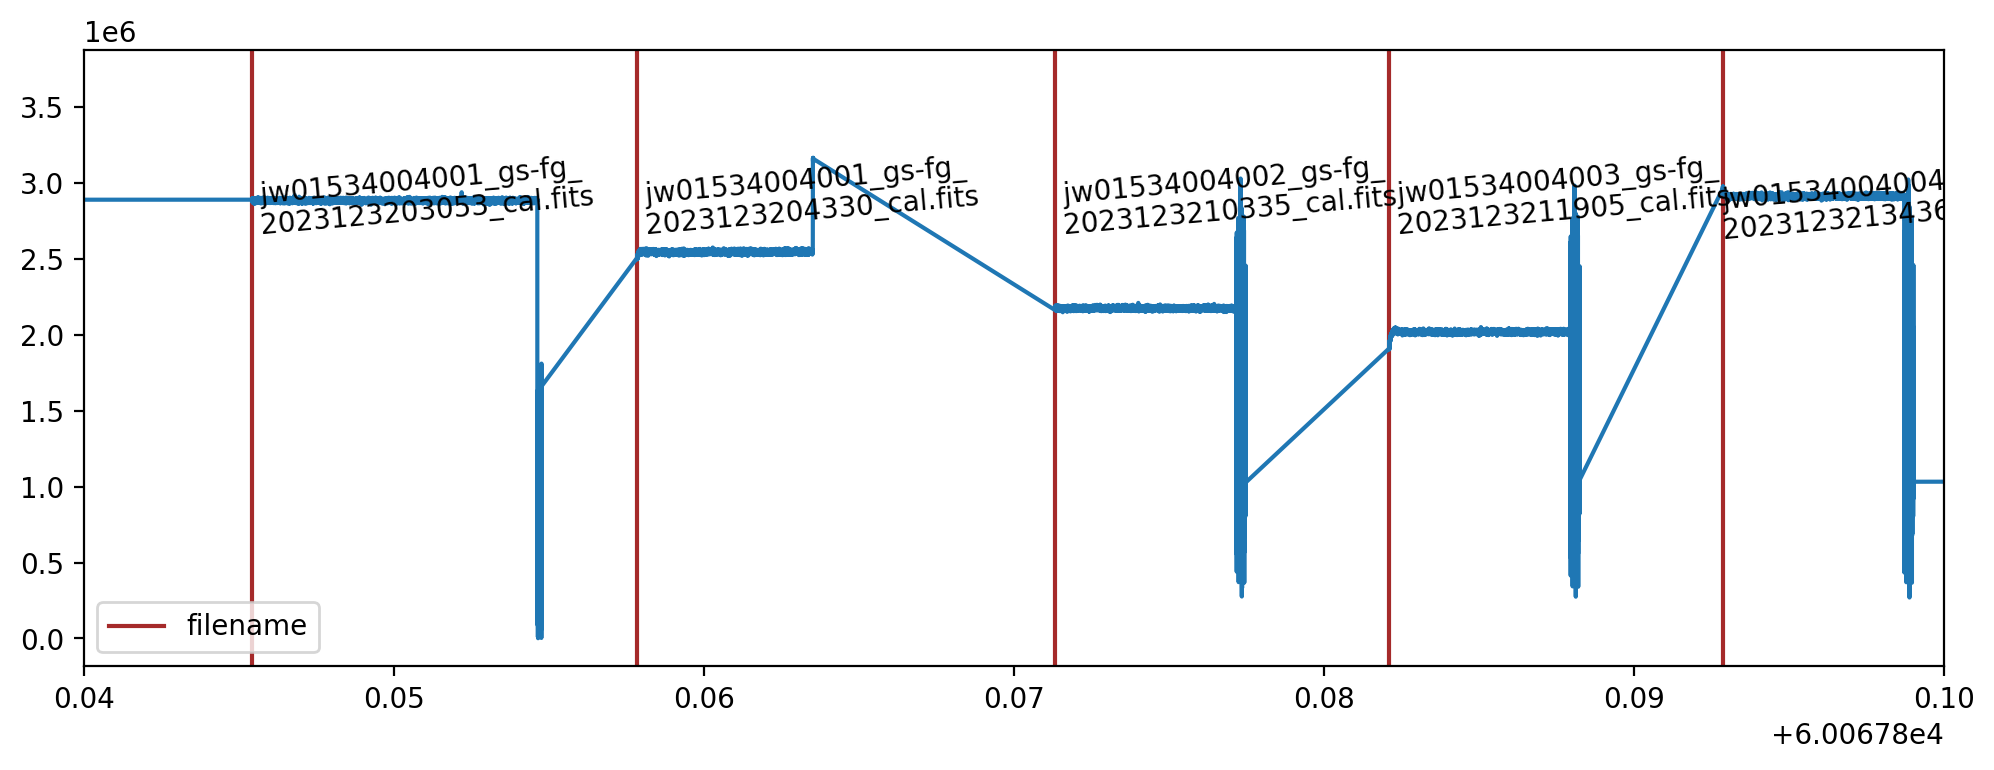

In [19]:
spk.mast_api_token = '8eedd0a371a44e598a9c4489e3148811'

fig, ax = plt.subplots(figsize=(12,4),dpi=200)
ax = spk.mnemonics_local('FILENAME')
#ax = spk.mnemonics_local('GUIDESTAR')
#ax = spk.mnemonics('SA_ZHGAUPST', 60067.84, 60067.9)

ax.plot(spk.fg_time, spk.fg_flux)
plt.legend(loc=3)

plt.xlim(60067.84, 60067.9)